<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/KMeans_Marketing_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Dataset for Clustering demo

Import make_blobs from datasets class in Scikit-Learn and generate data for 3 clusters.



In [0]:
from sklearn.datasets import make_blobs

In [0]:
X, Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, center_box=(1,9), shuffle=True, random_state=7)

X variable has the two features, Y value is the corresponding cluter number.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


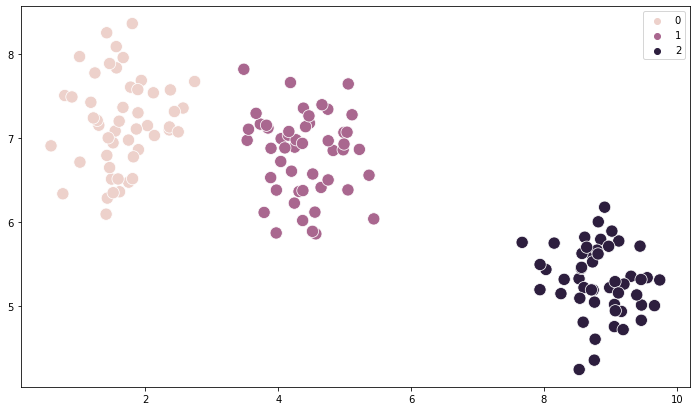

In [3]:
#Let's visualize the three clusters

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,7))
sns.scatterplot(X[:,0], X[:,1], hue=Y, markers='o', edgecolors='black', s=150)
plt.show()

Save features to a csv file

In [0]:
import pandas as pd
marketing_df = pd.DataFrame({"brand_loyality_score":X[:,0], "price_sensitivity_score":X[:,1]})
# we can also save Y (cluster labels) if you like
# marketing_df = pd.DataFrame({"brand_loyality_score":X[:,0], "price_sensitivity_score":X[:,1], "cluster_number":Y})

In [5]:
marketing_df.head()

,brand_loyality_score,price_sensitivity_score
0,9.310463,5.356477
1,1.887756,7.301291
2,9.554102,5.339255
3,1.239190,7.775585
4,4.042612,6.993620


In [0]:
marketing_df.to_csv("marketing_segmentation.csv", index=False)

# Cluster Analysis using KMeans Algorithm

In [8]:
# importing the dataset
market_data = pd.read_csv("marketing_segmentation.csv")
market_data.head()

,brand_loyality_score,price_sensitivity_score
0,9.310463,5.356477
1,1.887756,7.301291
2,9.554102,5.339255
3,1.239190,7.775585
4,4.042612,6.993620


In [9]:
#feature 1 is the Brand Loyality Score and feature 2 is the Price Sensitivity Score. Both the feature have values on a scale 1-10.
#Applying feature scaling by standardizing the data.

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(market_data)
market_data_scaled = std_scale.transform(market_data)
market_data_scaled[:5,]

array([[ 1.44943396, -1.14657865],
       [-1.02360028,  0.92047929],
       [ 1.53060763, -1.16488273],
       [-1.23968431,  1.42458632],
       [-0.30566383,  0.59346927]])

Run multiple iteration of KMeans algorithm to find an optimal number of clusters using elbow method.

In [0]:
from sklearn.cluster import KMeans
ssq = []

for K in range(1,11):
    kmeans_model = KMeans(n_clusters=K, random_state=911)
    kmeans_model.fit(market_data_scaled)
    ssq.append(kmeans_model.inertia_)

Generate Scree plot



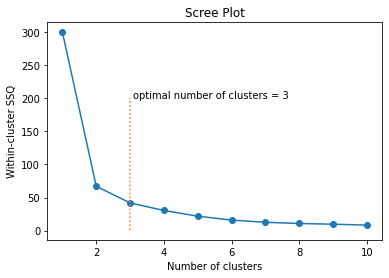

In [11]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.plot([3]*200, range(1,201), ":")
plt.text(3.1, 201, "optimal number of clusters = 3")
plt.show()

From the result we see that three should be the optimal number of clusters for the given data.

In [12]:
#Let's fit the KMeans model again with K=3
km = KMeans(n_clusters=3, random_state=123)
km.fit(market_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [13]:
#Make predictions for the clusters of the given dataset.
predicted_cluster = km.predict(market_data_scaled)
predicted_cluster[:5]

array([1, 2, 1, 2, 0], dtype=int32)

Plot the data partitioned into clusters.

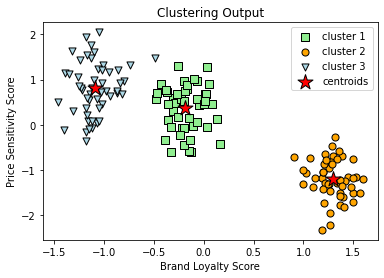

In [14]:
plt.scatter(market_data_scaled[predicted_cluster==0,0], market_data_scaled[predicted_cluster==0, 1], s=50, c='lightgreen',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(market_data_scaled[predicted_cluster==1,0], market_data_scaled[predicted_cluster==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(market_data_scaled[predicted_cluster==2,0], market_data_scaled[predicted_cluster==2, 1], s=50, c='lightblue',\
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Brand Loyalty Score")
plt.ylabel("Price Sensitivity Score")
plt.title("Clustering Output")
plt.show()

Interpreting Clustering output requires domain knowledge. For example, we could interpret the three clusters seen above as (From left to right):

- Cluster 3: Group of customers with least brand loyality points and highest senstivity to product pricings.
- Cluster 1: Group of customers that have moderate Brand loyality but are relatively more sensitive to product pricing.
- Cluster 2: Group of customers that are highly loyal to the brand and their purcahsing behaviour is least sensitive to price. (probably Apple customers if you ask me)

Accordingly, we may conclude following labels for each cluster:

- Cluster 3: Loyal to low cost
- Cluster 1: Value Conscious
- Cluster 2: Brand Advocates

We can insert these labels back into our dataset.

In [0]:
import numpy as np
predictions_relabelled = np.where(predicted_cluster==0, "Value Conscious", np.where(predicted_cluster==1,\
                                                                                    "Brand Advocates", "Loyal to low cost"))
market_data['category'] = pd.Series(predictions_relabelled, index=market_data.index)
market_data.index.name = "Customer Number"

In [16]:
pd.DataFrame(market_data).head()
# market_data.to_csv("marketing_segementation_output.csv", index=False)

,brand_loyality_score,price_sensitivity_score,category
Customer Number,,,
0,9.310463,5.356477,Brand Advocates
1,1.887756,7.301291,Loyal to low cost
2,9.554102,5.339255,Brand Advocates
3,1.239190,7.775585,Loyal to low cost
4,4.042612,6.993620,Value Conscious
